<a href="https://colab.research.google.com/github/phycoding/COVID19_Infection/blob/main/covid19_Lungs_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib
cts = joblib.load("/content/drive/MyDrive/kaggle/cts_cropped_lungs_224.pkl")
infections = joblib.load("/content/drive/MyDrive/kaggle/infections_cropped_lungs_224.pkl")
print(cts.shape)
print(infections.shape)

(1615, 224, 224)
(1615, 224, 224)


In [ ]:
cts = cts/255
infections = infections/255
cts = cts.reshape(len(cts),224,224,1)
infections = infections.reshape(len(infections),224,224,1)


In [ ]:
import matplotlib.pyplot as plt
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(10,30))

    plt.subplot(1,2,1)
    plt.imshow(array_list[0].reshape(new_dim, new_dim), cmap='bone')
    plt.title('Original Image')

    # plt.subplot(1,2,2)
    # plt.imshow(array_list[0], cmap='bone')
    # plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    # plt.title('Lung Mask')

    plt.subplot(1,2,2)
    plt.imshow(array_list[0].reshape(new_dim, new_dim), cmap='bone')
    plt.imshow(array_list[1].reshape(new_dim, new_dim), alpha=0.5, cmap=color_map)
    plt.title('Infection Mask')

    # plt.subplot(1,2,2)
    # plt.imshow(array_list[0].reshape(img_size,img_size), cmap='bone')
    # plt.imshow(array_list[1].reshape(img_size, img_size), alpha=0.5, cmap=color_map)
    # plt.title('Lung and Infection Mask')

#     plt.subplot(1,4,4)
#     plt.imshow(array_list[0], cmap='bone')
#     plt.imshow(array_list[3], alpha=0.5, cmap=color_map)
#     plt.title('Lung and Infection Mask')

    plt.show()

In [ ]:
new_dim =224
img_size = 512

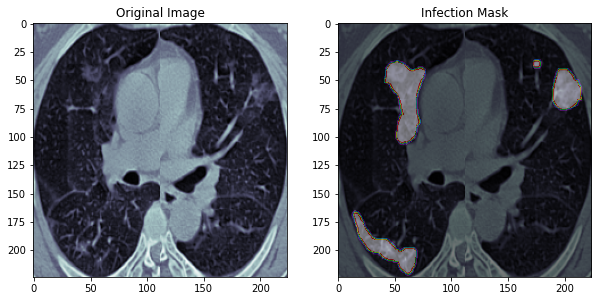

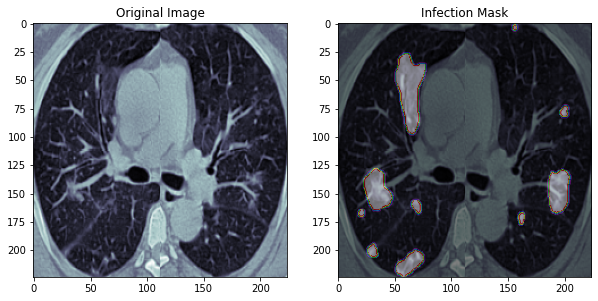

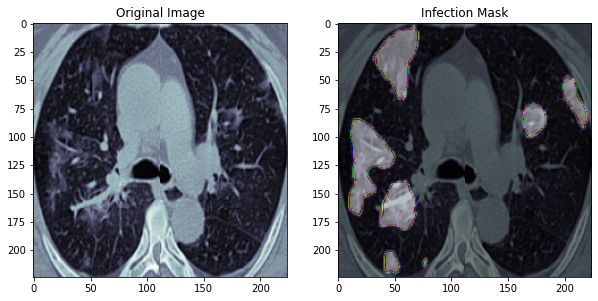

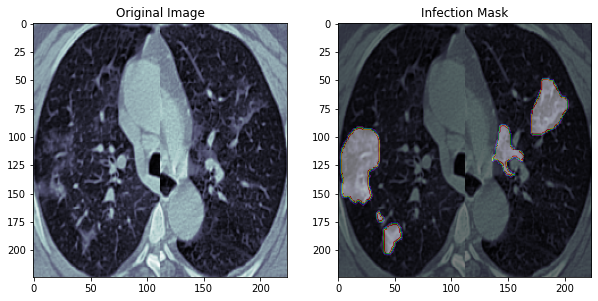

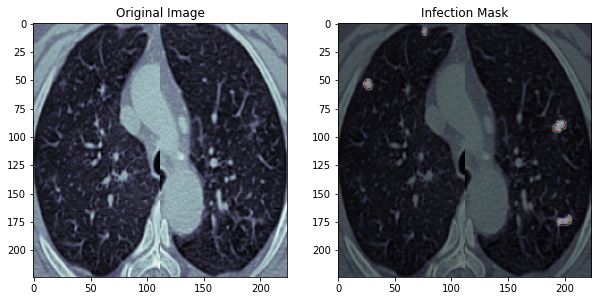

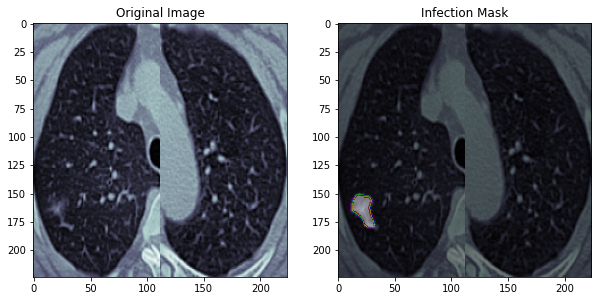

In [ ]:
for index in [100,110,120,130,140,150]:
    plot_sample([cts[index], infections[index]])

In [ ]:
import tensorflow as tf
import keras

In [ ]:

from keras.layers import Input
from keras.layers.core import Activation, Reshape, Dropout
from keras.layers.convolutional import MaxPooling2D, UpSampling2D, Conv2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.utils import np_utils

def to_categorical(y, nb_classes):
    num_samples = len(y)
    Y = np_utils.to_categorical(y.flatten(), nb_classes)
    return Y.reshape((num_samples, y.size // num_samples, nb_classes))

def SegNet(input_shape=(224, 224,1), classes=1):

    img_input = Input(shape=input_shape)
    x = img_input

    # Encoder
    
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', 
                                              kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same',
                                              kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = Dropout(0.25)(x)
    
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', 
                                               kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', 
                                               kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', 
                                               kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = Dropout(0.5)(x)


    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', 
                                               kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', 
                                               kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', 
                                               kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

  
    
    
    
    #Decoder
    
    # Deconv Block 2
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', 
                                                      kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', 
                                                      kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', 
                                                      kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    
    
    # Deconv Block 3
    x = UpSampling2D(size=(2, 2))(x)
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same', 
                                                     kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same', 
                                                     kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = Conv2D(4, kernel_size=3, activation='relu', padding='same',
                                                    kernel_initializer = 'he_normal')(x)
    x = Dropout(0.25)(x)
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (x)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (x)
    model = keras.Model(inputs=[img_input], outputs=[outputs])
    
    return model

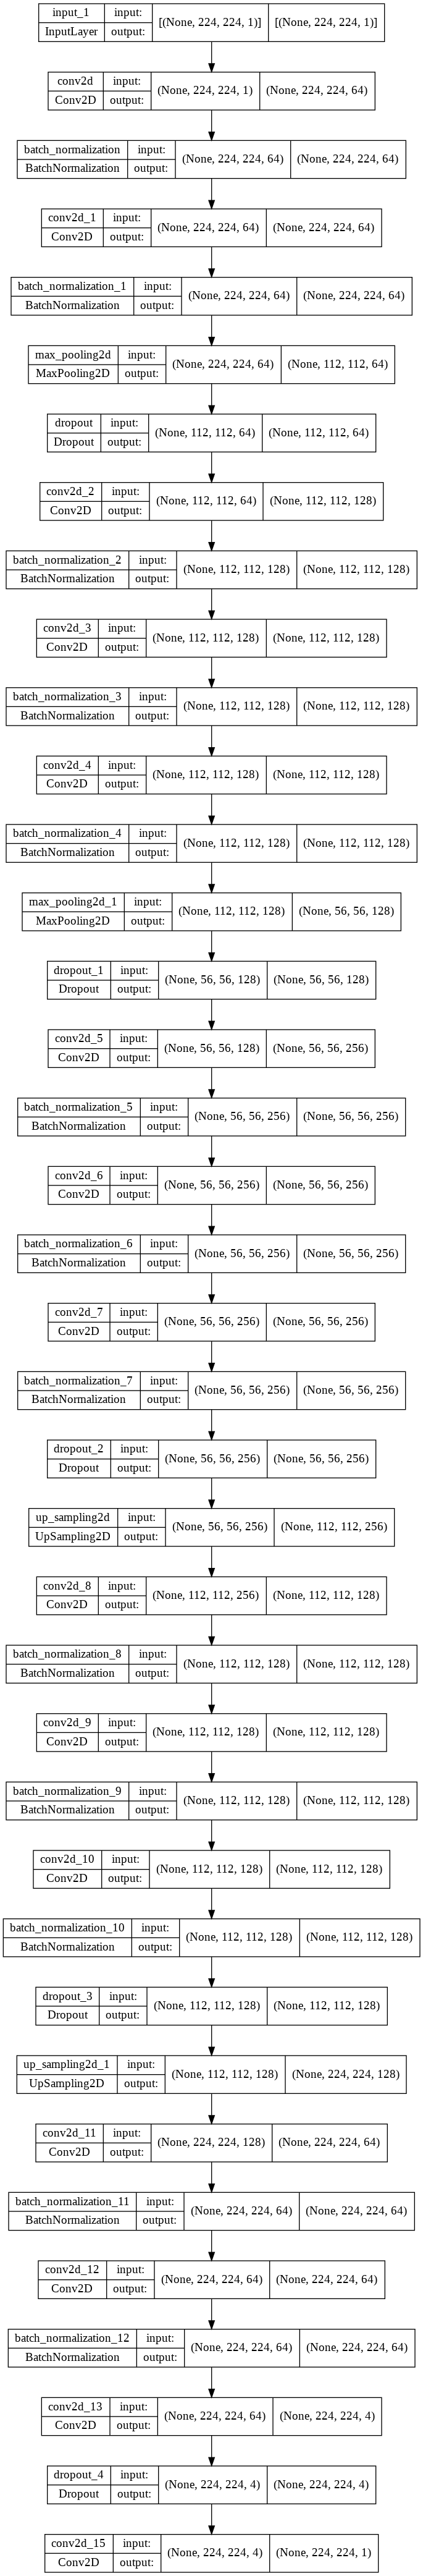

In [ ]:
tf.keras.utils.plot_model(SegNet(),show_shapes = True)

In [ ]:
model = SegNet()

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=42, shuffle=True)

In [ ]:
batch_size = 32
epochs = 80
#lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=7, verbose=1)
filepath_dice_coeff_1="segnet_covid_fold1.hdf5"
filepath_dice_coeff_2="segnet_covid_fold2.hdf5"
filepath_dice_coeff_3="segnet_covid_fold3.hdf5"

checkpoint_dice_1 = tf.keras.callbacks.ModelCheckpoint(filepath_dice_coeff_1, monitor='val_dice_coeff', verbose=1, save_best_only=True, mode='max')
checkpoint_dice_2 = tf.keras.callbacks.ModelCheckpoint(filepath_dice_coeff_2, monitor='val_dice_coeff', verbose=1, save_best_only=True, mode='max')
checkpoint_dice_3 = tf.keras.callbacks.ModelCheckpoint(filepath_dice_coeff_3, monitor='val_dice_coeff', verbose=1, save_best_only=True, mode='max')

In [ ]:
batch_size = 32

In [ ]:
import tensorflow as tf
from keras import backend as K

In [ ]:
def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss


def bce_dice_loss(y_true, y_pred):
    loss = 0.5* tf.keras.losses.binary_crossentropy(y_true, y_pred) + 0.5*dice_loss(y_true, y_pred)
    return loss

In [ ]:
fold_number = 1

for train_index, test_index in kf.split(cts):
  print("Current fold number going:", fold_number)
  x_train, x_valid = cts[train_index], cts[test_index]
  y_train, y_valid = infections[train_index], infections[test_index]
  print("Shapes:", x_train.shape, x_valid.shape)

  if fold_number == 1:
    model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005), loss=bce_dice_loss, metrics=[dice_coeff])

    results_1 = model.fit(x_train, y_train, batch_size=batch_size, epochs=80,
                    validation_data=(x_valid, y_valid),
                    callbacks = [checkpoint_dice_1])
  '''
  if fold_number == 2:
    model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0005), loss=bce_dice_loss, metrics=[dice_coeff])

    results_2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=20,
                    validation_data=(x_valid, y_valid),
                    callbacks = [checkpoint_dice_2])
    
  if fold_number == 3:
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss=bce_dice_loss, metrics=[dice_coeff])

    results_3 = model.fit(x_train, y_train, batch_size=batch_size, epochs=20,
                    validation_data=(x_valid, y_valid),
                    callbacks = [checkpoint_dice_3])
    
  
  fold_number = fold_number + 1
  '''

Current fold number going: 1
Shapes: (807, 224, 224, 1) (808, 224, 224, 1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
26/26 [==============================] - ETA: 0s - loss: 0.6977 - dice_coeff: 0.2009
Epoch 1: val_dice_coeff improved from -inf to 0.12686, saving model to segnet_covid_fold1.hdf5
26/26 [==============================] - 69s 2s/step - loss: 0.6977 - dice_coeff: 0.2009 - val_loss: 8.2715 - val_dice_coeff: 0.1269
Epoch 2/80
26/26 [==============================] - ETA: 0s - loss: 0.5096 - dice_coeff: 0.3044
Epoch 2: val_dice_coeff improved from 0.12686 to 0.12920, saving model to segnet_covid_fold1.hdf5
26/26 [==============================] - 34s 1s/step - loss: 0.5096 - dice_coeff: 0.3044 - val_loss: 60.1850 - val_dice_coeff: 0.1292
Epoch 3/80
26/26 [==============================] - ETA: 0s - loss: 0.4736 - dice_coeff: 0.3416
Epoch 3: val_dice_coeff improved from 0.12920 to 0.14892, saving model to segnet_covid_fold1.hdf5
26/26 [==============================] - 34s 1s/step - loss: 0.4736 - dice_coeff: 0.3416 - val_loss: 26.6464 - val_dice_coeff: 0.1489
Epoch 4/80
26/26 [==

In [ ]:
def create_model():
  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss=bce_dice_loss, metrics=[dice_coeff])
  return model


In [ ]:
model.save_weights(filepath_dice_coeff_1)

In [ ]:
!pip install segmentation_models
import gc
import segmentation_models as sm
import numpy as np

     |████████████████████████████████| 50 kB 5.5 MB/s 
Segmentation Models: using `keras` framework.


In [ ]:
model.load_weights("/content/drive/MyDrive/kaggle/segnet_covid_fold1.hdf5")

In [ ]:
split_number = 1
the_range = np.arange(0.30,0.80, 0.05)
print(len(the_range))

total_dices=[]
total_ious=[]
total_precisions=[]
total_recalls=[]

for train_index, test_index in kf.split(cts):

  dices_per_threshold = []
  ious_per_threshold = []
  precisions_per_threshold = []
  recalls_per_threshold = []

  print(".................................................................................................................................................")
  print("Current split number going:", split_number)
  print(".................................................................................................................................................")
  x_train, x_valid = cts[train_index], cts[test_index]
  y_train, y_valid = infections[train_index], infections[test_index]
  for t in the_range:

    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print("Calculating for threshold:", t)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss=bce_dice_loss, metrics=[sm.metrics.FScore(threshold=t)])
    dices_per_threshold.append(model.evaluate(x_valid, y_valid, batch_size=32)[1])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss=bce_dice_loss, metrics=[sm.metrics.IOUScore(threshold=t)])
    ious_per_threshold.append(model.evaluate(x_valid, y_valid, batch_size=32)[1])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss=bce_dice_loss, metrics=[sm.metrics.Precision(threshold=t)])
    precisions_per_threshold.append(model.evaluate(x_valid, y_valid, batch_size=32)[1])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss=bce_dice_loss, metrics=[sm.metrics.Recall(threshold=t)])
    recalls_per_threshold.append(model.evaluate(x_valid, y_valid, batch_size=32)[1])

  total_dices.append(dices_per_threshold)
  total_ious.append(ious_per_threshold)
  total_precisions.append(precisions_per_threshold)
  total_recalls.append(recalls_per_threshold)

  split_number = split_number + 1

10
.................................................................................................................................................
Current split number going: 1
.................................................................................................................................................
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Calculating for threshold: 0.3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
26/26 [==============================] - 15s 532ms/step - loss: 0.0722 - recall: 0.9411
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Calculating for threshold: 0.35
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
26/26 [==============================] - 14s 529ms/step - loss: 0.0722 - recall: 0.9356
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Calculating for threshold: 0.39999999999999997
%%%%%%%%%%%%%%%%%%%

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
total_dices = np.array(total_dices)
total_dices = np.transpose(total_dices)
df_dices = pd.DataFrame(data=total_dices, index = the_range, columns = [1])
print("3-fold Dices dataframe")
print("Rows indices: Thresholds, Column indices: Split Number")
df_dices

3-fold Dices dataframe
Rows indices: Thresholds, Column indices: Split Number


1
0.30  0.904314
0.35  0.905978
0.40  0.907157
0.45  0.907934
0.50  0.908464
0.55  0.908751
0.60  0.908736
0.65  0.908413
0.70  0.907619
0.75  0.906384

In [ ]:
print("Maximum validation dice on any splits:", np.max(total_dices))
print("Maximum validation dice  (any threshold chosen):", np.array(df_dices.max(axis=0)))
print("Best threshold for each split", the_range[df_dices[1].argmax()])
print("Mean of all obtained dices:", df_dices.mean().mean())

Maximum validation dice on any splits: 0.9087508320808411
Maximum validation dice  (any threshold chosen): [0.90875083]
Best threshold for each split 0.5499999999999999
Mean of all obtained dices: 0.907375019788742


In [ ]:
total_ious = np.array(total_ious)
total_ious = np.transpose(total_ious)
df_ious = pd.DataFrame(data=total_ious, index = the_range, columns = [1])
print("3-fold Ious dataframe")
print("Rows indices: Thresholds, Column indices: Split Number")
df_ious

3-fold Ious dataframe
Rows indices: Thresholds, Column indices: Split Number


1
0.30  0.826184
0.35  0.828971
0.40  0.830966
0.45  0.832296
0.50  0.833216
0.55  0.833737
0.60  0.833752
0.65  0.833253
0.70  0.831984
0.75  0.829989

In [ ]:
print("Maximum validation iou on any splits:", np.max(total_ious))
print("Maximum validation iou on each of the 3 splits (any threshold chosen):", np.array(df_ious.max(axis=0)))
print("Best threshold for each split", the_range[df_ious[1].argmax()])
print("Mean of all obtained ious:", df_ious.mean().mean())

Maximum validation iou on any splits: 0.8337520360946655
Maximum validation iou on each of the 3 splits (any threshold chosen): [0.83375204]
Best threshold for each split 0.5999999999999999
Mean of all obtained ious: 0.831434714794159


In [ ]:
total_precisions = np.array(total_precisions)
total_precisions = np.transpose(total_precisions)
df_precision = pd.DataFrame(data=total_precisions, index = the_range, columns = [1])
print("3-fold precision dataframe")
print("Rows indices: Thresholds, Column indices: Split Number")
df_precision

3-fold precision dataframe
Rows indices: Thresholds, Column indices: Split Number


1
0.30  0.870506
0.35  0.878386
0.40  0.885310
0.45  0.891516
0.50  0.897432
0.55  0.903114
0.60  0.908648
0.65  0.914217
0.70  0.919990
0.75  0.926261

In [ ]:
print("Maximum validation precision on any splits:", np.max(total_precisions))
print("Maximum validation precision on each of the 3 splits (any threshold chosen):", np.array(df_precision.max(axis=0)))
print("Best threshold for each split", the_range[df_precision[1].argmax()])
print("Mean of all obtained precisions:", df_precision.mean().mean())

Maximum validation precision on any splits: 0.9262607097625732
Maximum validation precision on each of the 3 splits (any threshold chosen): [0.92626071]
Best threshold for each split 0.7499999999999999
Mean of all obtained precisions: 0.8995379149913788


In [ ]:
total_recalls = np.array(total_recalls)
total_recalls = np.transpose(total_recalls)
df_recall = pd.DataFrame(data=total_recalls, index = the_range, columns = [1])
print("3-fold precision dataframe")
print("Rows indices: Thresholds, Column indices: Split Number")
df_recall

3-fold precision dataframe
Rows indices: Thresholds, Column indices: Split Number


1
0.30  0.941077
0.35  0.935585
0.40  0.930360
0.45  0.925251
0.50  0.920098
0.55  0.914838
0.60  0.909267
0.65  0.903194
0.70  0.896178
0.75  0.888059

In [ ]:
print("Maximum validation recall on any splits:", np.max(total_recalls))
print("Maximum validation recall on each of the 3 splits (any threshold chosen):", np.array(df_recall.max(axis=0)))
print("Best threshold for each split", the_range[df_recall[1].argmax()])
print("Mean of all obtained recalls:", df_recall.mean().mean())

Maximum validation recall on any splits: 0.9410769939422607
Maximum validation recall on each of the 3 splits (any threshold chosen): [0.94107699]
Best threshold for each split 0.3
Mean of all obtained recalls: 0.9163907170295715


In [ ]:
plt.rcParams.update({'font.size': 22})
def compare_actual_and_predicted(image_no):

    fig = plt.figure(figsize=(50,50))

    plt.subplot(1,5,1)
    plt.imshow(cts[image_no].reshape(new_dim, new_dim), cmap='bone')
    plt.title('Original Image (CT)')

    plt.subplot(1,5,2)
    plt.imshow(infections[image_no].reshape(new_dim,new_dim), cmap='bone')
    plt.title('Actual mask')

    plt.subplot(1,5,3)
    temp = model.predict(cts[image_no].reshape(1,new_dim, new_dim, 1))
    plt.imshow(temp.reshape(new_dim,new_dim), cmap='bone')
    plt.title('Model 1 output')

    plt.show()

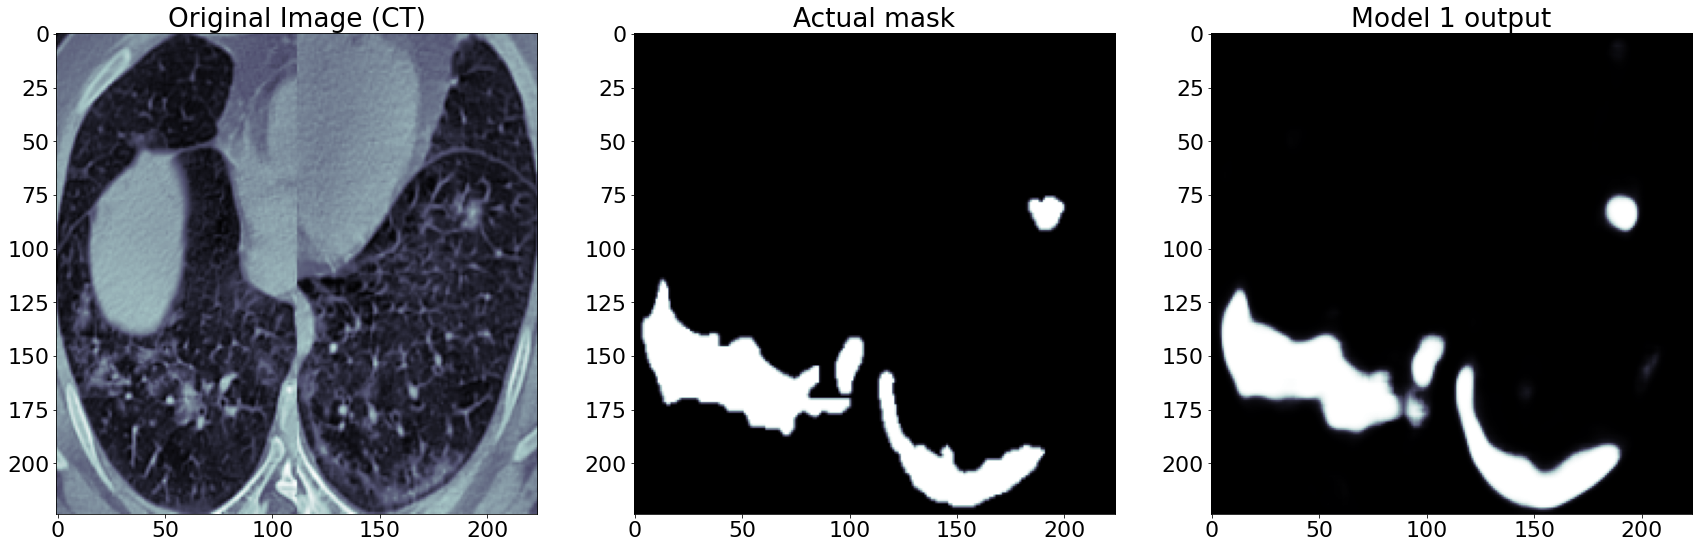

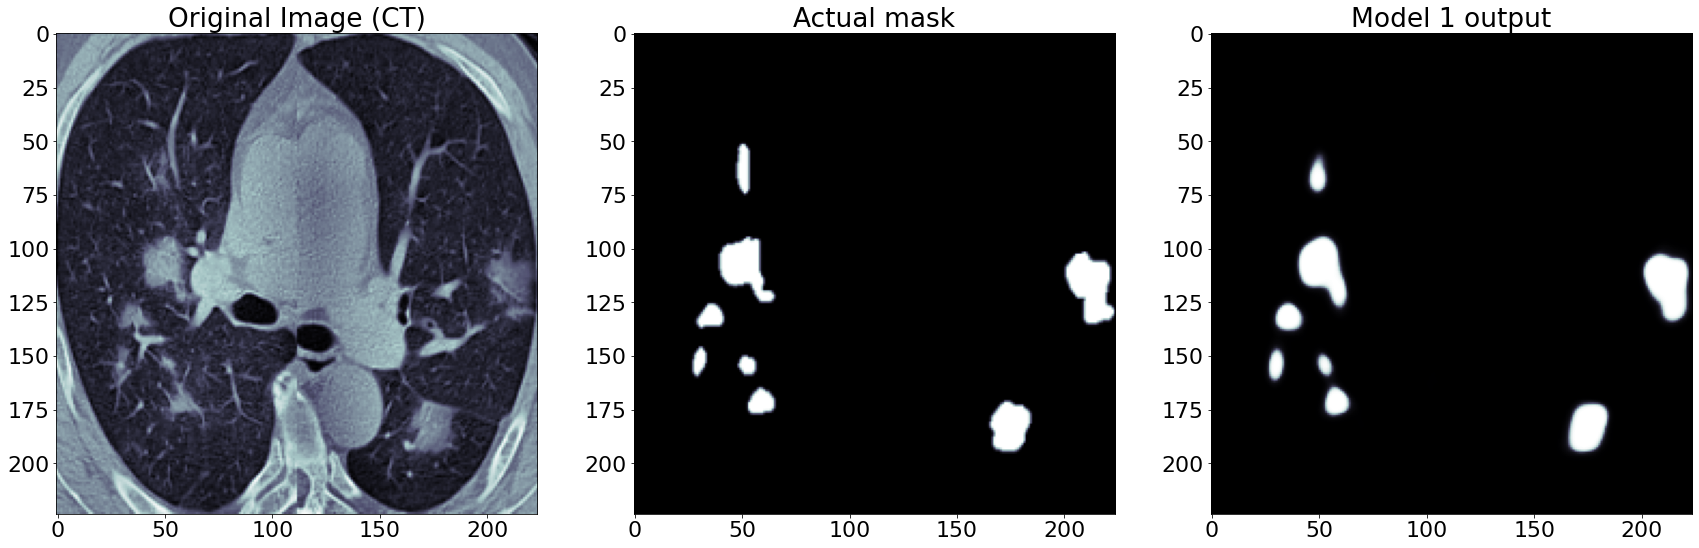

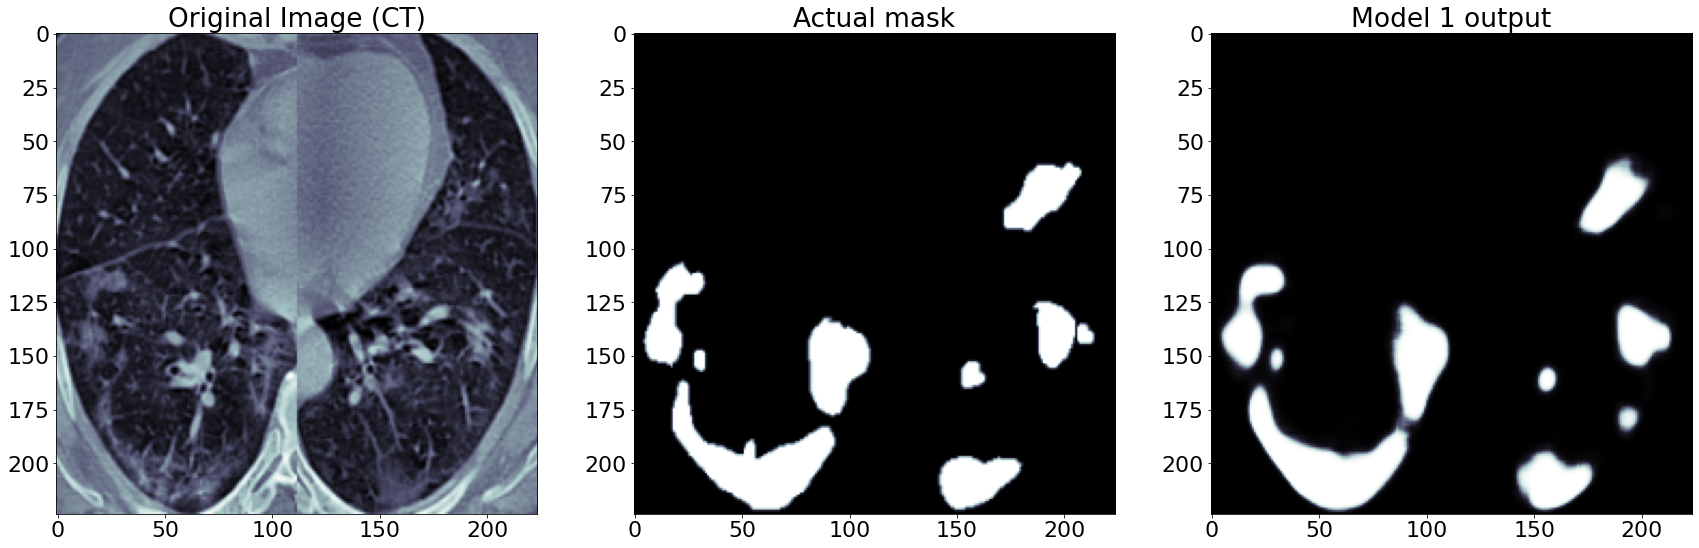

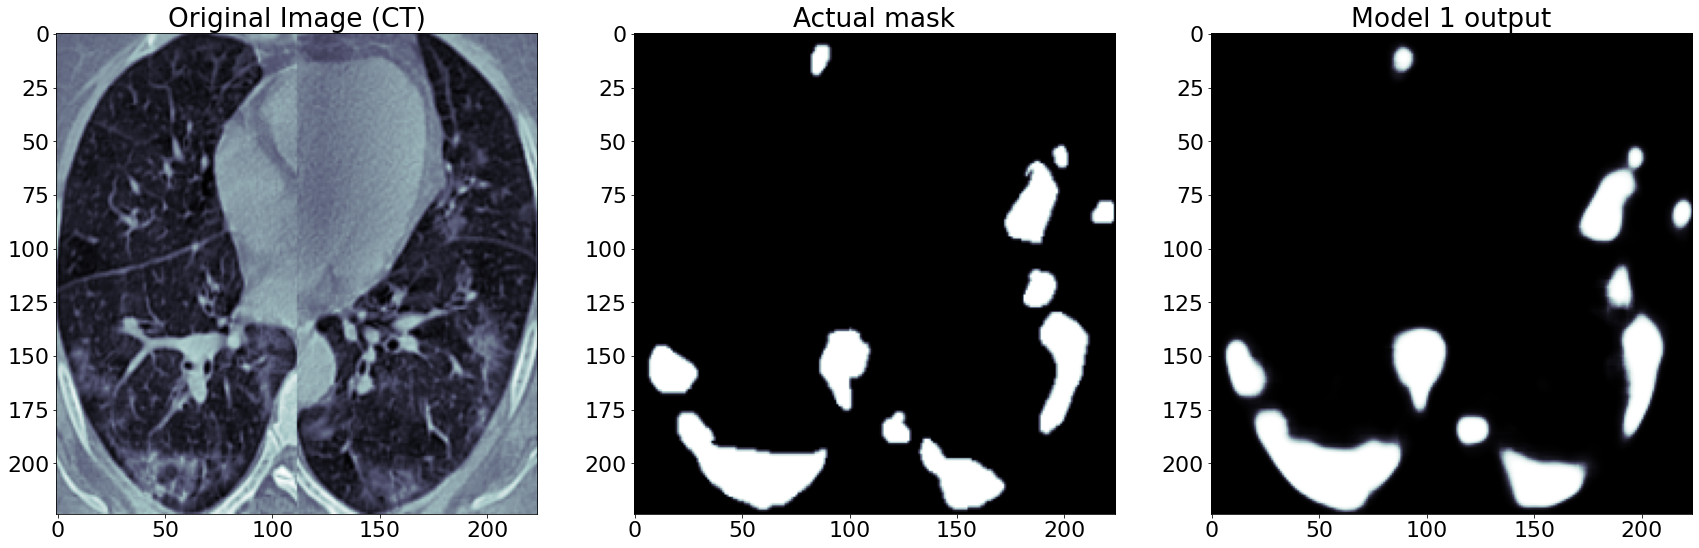

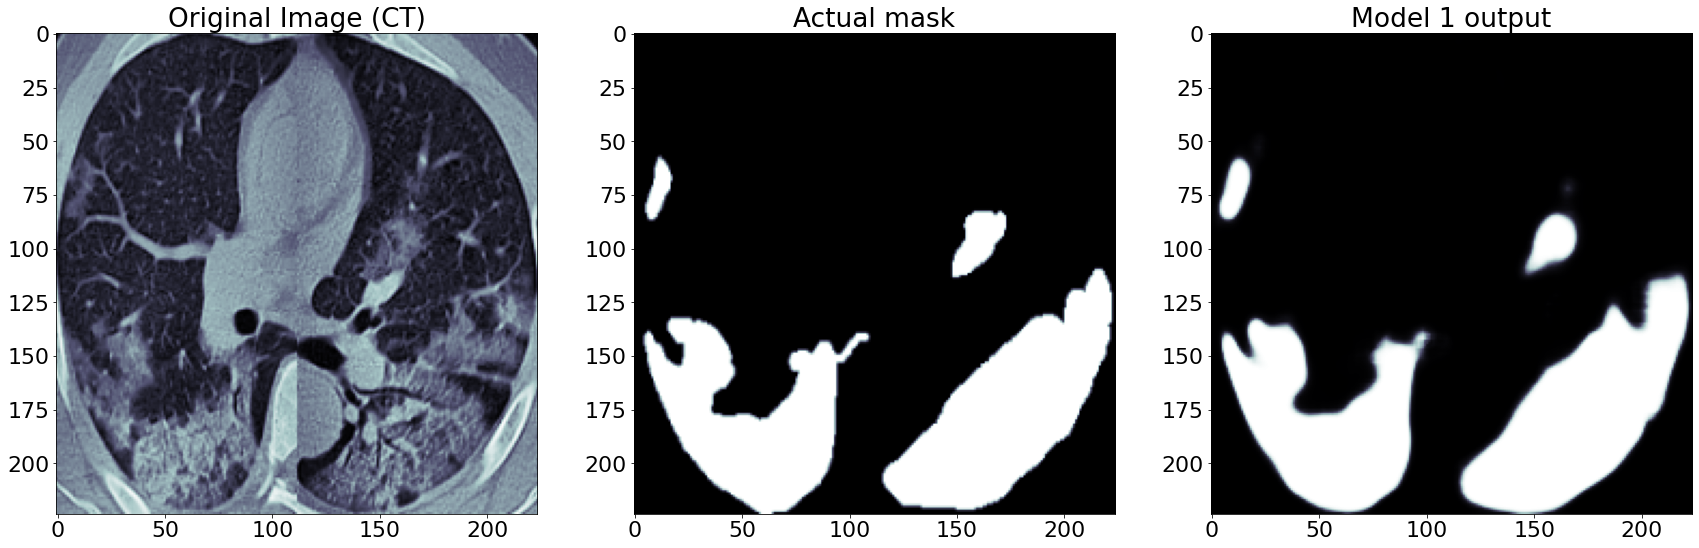

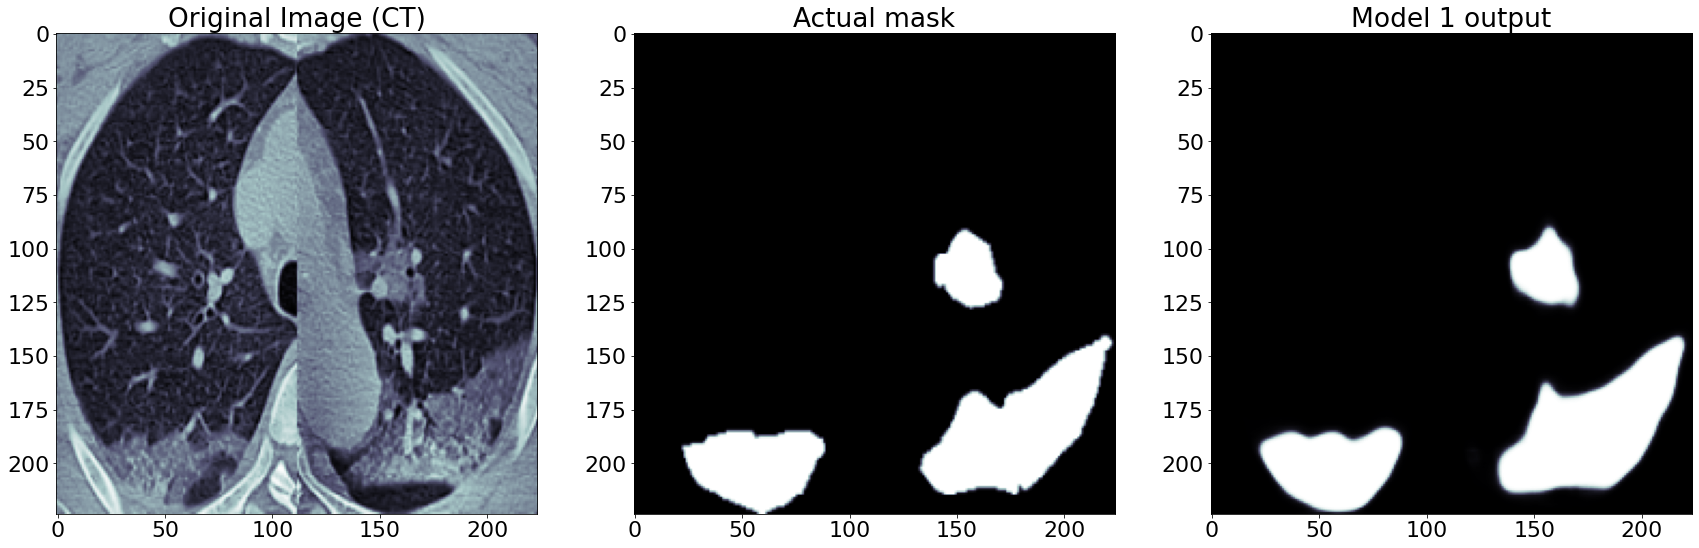

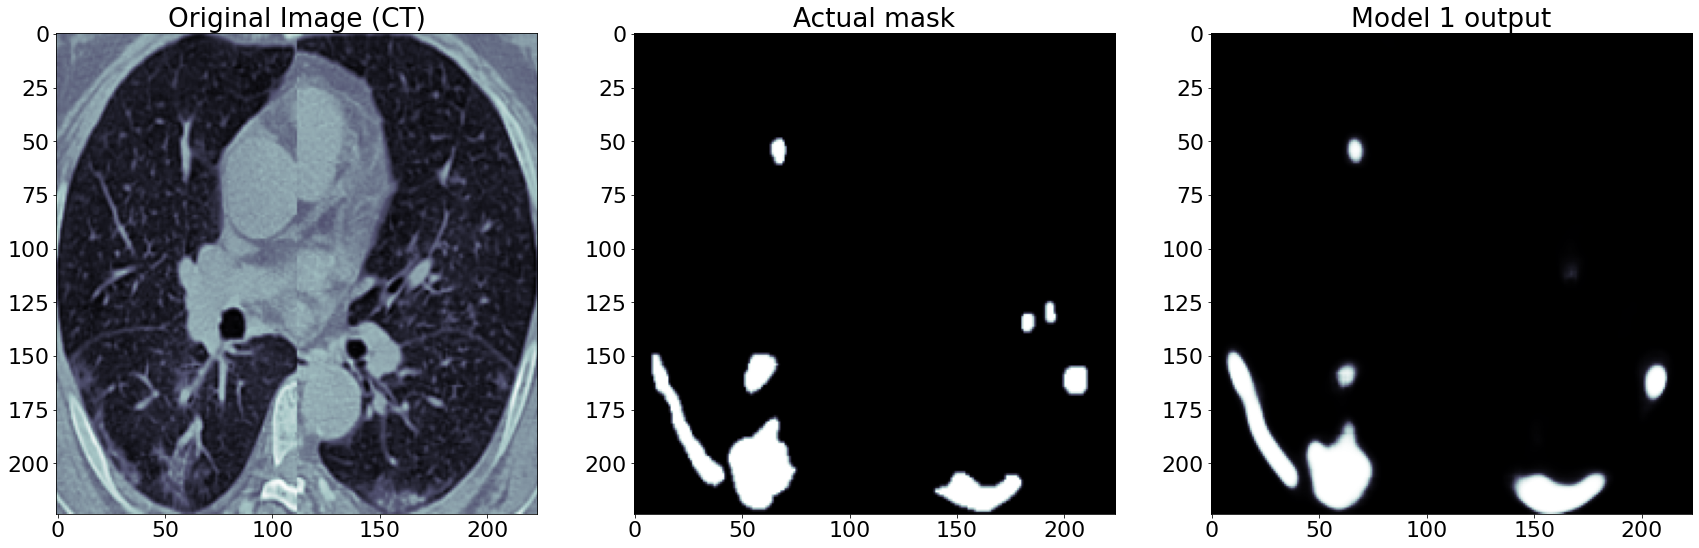

In [ ]:
for i in [32,240,53,59, 355, 383, 90]:
    compare_actual_and_predicted(i)